<a href="https://colab.research.google.com/github/rharkovsky/pucCienciadeDados/blob/main/MVP1_Harkovsky4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise Exploratória de Dados 

## ROBERTO HARKOVSKY

### Base Netflix Originals

## 1. Definição do Problema

O dataset usado neste projeto será o NetflixOriginals, proveniente originalmente do Kaggle. Este dataset consiste em todos os filmes originais da Netflix lançados até 1º de junho de 2021. Além disso, também inclui todos os documentários e especiais da Netflix. Seu objetivo é apresentar as características do filme e sua classificação IMDB que mede a receptividade do público ao produto. 

O score do IMDB são obtidos através de votação dos membros da comunidade. Além disto a maioria dos filmes tem mais de 1.000 críticas. Um usuário pode classificar um filme com valores no IMDB que vão de 0 (zero - pior avaliação),  a 10(dez - melhor avaliação).

Nesta análise as possiveis variáveis preditoras incluem Genre (Genero), Premiere, Runtime (Duração) e Language (linguagem). A variável alvo é o IMDB Score (IMDB).

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores 


**Informações sobre os atributos originais:**

1.	Title - Título do filme
2.	Genre - Gênero do filme
3.	Premiere - Data de estreia do filme original
4.	Runtime - Tempo de execução do filme em minutos
5.	IMDB Score - Pontuações do IMDB  que indicam a aceitação do público para o produto Original lançado
6.	Language - Linguagem na qual o filme foi produzido 

Um IMDB alto indica uma melhor aceitação do público, o que pode levar a uma melhor performance financeira do produto (filme).

Assim, a análise irá procurar correlacionar as possiveis variaveis que possam indicar, ou prever a avaliação (IMDB) de um novo filme.

## 2. Carga de dados
Nesta primeira etapa será feita a importação dos pacotes necessários a análise. Em seguida ocorre a carga do dataset


### Importando Biliotecas

In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

### Funções utilizadas nesta análise exploratória dos dados
Trata-se de um conjunto de funções úteis para impressão de graficos e informações sobre os datasets utilizadados ao longo desta analise exporatória, que aparecem em diversas etapas da análise.

O objetivo é tornar o codigo mais limpo e de fácil de entendimento.

In [3]:
# Função para impressão de 2 gráficos barplot: 
# parametros: 
# var1 - Atributo a ser agrupado por IMDB e titulos, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime_por_titulo_imdb (var1, linhas, absoluto):

# Mostra top generos avaliados definido por parametro "linhas"
  plt.figure(figsize=(10,15))
  sns.set(style="darkgrid")

  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_titulos_df = ds.groupby([var1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_titulos_df = top_titulos_df[0:linhas]
  avg_rating_top_df = avg_rating_df[(avg_rating_df[var1].isin(top_titulos_df[var1]) == True)] # maiores IMDBs relativos top linhas
  #avg_rating_df = avg_rating_df[0:linhas] # maiores IMDBs absolutos

  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')

# 1o gráfico
  ax1.set_title('Maiores Lançamentos de filmes por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.barplot(x = 'Titulo', y = var1, data = top_titulos_df, ax = ax1)
  
# 2o gráfico
  ax2.set_title('Média de Avaliações dos Maiores Lançamentos por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax2.set_xlabel('IMDB', fontsize = 10)
  #ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=6)
  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_top_df, ax=ax2)

  plt.subplots_adjust(hspace=0.6);
  plt.yticks(size= 10)
  plt.xticks(size= 10)
  plt.show()

# Função para impressão de um gráfico barplot por IMDB
# parametros: 
# var1 - Atributo a ser comparado, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime_por_imdb (var1, linhas):
  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  avg_rating_df = avg_rating_df[0:linhas] # maiores IMDBs absolutos

  fig, (ax1) = plt.subplots(1,1, figsize= (10,3), layout='constrained')

  ax1.set_title('Média de Avaliações por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_df, ax=ax1)

  #return(avg_rating_df)

# Função para impressão das tabelas que alimentas os graficos
# parametros: 
# atrib1 - Atributo a ser comparado, 
# linhas - quantidade de linhas da tabela a apresentar
# tab_num - imprime a tabela tab_num (tabn) 
#                               tab1: atr1 - titulos (top n)
#                               tab2: atr1 - IMDB (top n titulos)
#                               tab3: atr1 - IMDB absoluto
def tabela_por_titulo_imdb(atr1, linhas, tab_num):
  avg_rating_df = ds.groupby([atr1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_df = ds.groupby([atr1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_df = top_df[0:linhas]

  if  tab_num==1: 
    display(top_df)
    total_titulos = top_df['Titulo'].sum()
    print(f'\n')
    print(f'Nestas top {linhas} ocorrências de {atr1} temos {total_titulos} títulos')
    print(f'Esta amostra equivale a {100*total_titulos/584:2.1f}% do total lançado')
  elif tab_num==2:
    avg_rating_df = avg_rating_df[(avg_rating_df[atr1].isin(top_df[atr1]) == True)]
    max_imdb=avg_rating_df['IMDB'].max()
    min_imdb=avg_rating_df['IMDB'].min()
    display(avg_rating_df)
    print(f'\n')
    print(f'Nestas top {linhas} ocorrências de {atr1} por média de IMDb temos valor máximo {max_imdb:2.1f} e minimo de {min_imdb:2.1f}')
  else: # valores absolutos
    avg_rating_df = avg_rating_df[0:linhas]
    max_imdb=avg_rating_df['IMDB'].max()
    min_imdb=avg_rating_df['IMDB'].min()
    display(avg_rating_df)
    print(f'\n')
    print(f'Nestas {linhas} ocorrências de {atr1} por média de IMDb temos valor máximo {max_imdb:2.1f} e minimo de {min_imdb:2.1f}')

# Função para impressão de 2 gráficos boxplot
# parametros: 
# var1,var2 - Atributos a serem impressos 
def imprime2graficosboxplot(var1, var2):

  def outliers(variavel):
 #calculado a faixa dos quartis a serem usados
    imdb_q1 = ds[variavel].quantile(0.25) #1o quartil 
    imdb_q3 = ds[variavel].quantile(0.75) #3o quartil
    imdb_iqr = imdb_q3-imdb_q1 # calculando 2o quartil
    imdb_up = imdb_q3 + 1.5 * imdb_iqr #limte superior do 4o quartil
    imdb_low = imdb_q1 - 1.5 * imdb_iqr #limite inferior do 1o quartil
  # descobrindo os outliers 
    outlier_imdb = ds[(ds[variavel] < imdb_low) | (ds[variavel] > imdb_up)]
    count_imdb = outlier_imdb.count()[variavel]
    
    print(f"Outliers de {variavel}: {count_imdb}")
    return(ds[variavel])

# Imprimindo gráficos
  plt.figure(figsize=(10,15))
  #sns.set(style="darkgrid")
  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')

# 1o gráfico
  ax1.set_title('outliers de ' + var1 , fontsize = 10)
  #ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.boxplot(x = outliers(var1), ax=ax1)
  
# 2o gráfico
  ax2.set_title('outliers de ' + var2 , fontsize = 10)
  #ax2.set_xlabel('IMDB', fontsize = 10)
  sns.boxplot(x = outliers(var2), ax=ax2)
  
  plt.subplots_adjust(hspace=0.6);
  #plt.yticks(size= 10)
  #plt.xticks(size= 10)
  plt.show()

# Função para contagem de variaveis (atributos) por titulo
# parametros: 
# var - Atributos a serem contados 
def conta_var(var):
  general_df = ds.groupby([var], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  num = general_df[var].count()
  print(f'Existem {num} diferentes {var}')
  return(general_df)

### *Preparando o Dataset*

In [4]:
# conexão com GDrive
#from google.colab import drive
#drive.mount('/content/gdrive')
#arquivo = "NetflixOriginals.csv"
#url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo

# Conexão com GitHub
arquivo = "NetflixOriginals.csv"
url_dados = "https://raw.githubusercontent.com/rharkovsky/puc_mvp1/main/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

<class 'pandas.core.frame.DataFrame'>


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


Para uma melhor documentação decidi alterar os nomes das variaveis para Portugues

In [5]:
# Aproveitando a alteração para traduzir as colunas 
ds.rename(columns= {'Title' : 'Titulo'}, inplace= True)
ds.rename(columns= {'Genre' : 'Genero'}, inplace= True)
ds.rename(columns= {'Runtime' : 'Duracao'}, inplace= True)
ds.rename(columns= {'Language' : 'Linguagem'}, inplace= True)
ds.rename(columns= {'IMDB Score' : 'IMDB'}, inplace= True)

# exibe as 5 primeiras linhas
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [6]:
categorias = [0, 5, 10]
labels = ['negativa', 'positiva']
classes = pd.cut(x=ds.IMDB, bins=categorias, labels=labels)
ds['percepcao'] = classes
ds.head(20)

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,percepcao
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,negativa
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,negativa
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,negativa
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,negativa
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,negativa
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,negativa
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,negativa
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,negativa
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,negativa
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,negativa


## 3. Análise Exploratória de Dados
Nesta etapa será realizada uma primeira análise das variaveis do dataset, onde serão determinadas as suas dimensões, tipos de variaveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

### 3.1. Estatísticas Descritivas
Verificando informações do dataset, como  dimensão, variaveis e estatísticas das variaveis numéricas.

In [7]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(584, 7)


O dataset possui 6 colunas com 584 linhas

In [8]:
# exibe as 10 primeiras e 10 últimas linhas para ter uma amostra inicial sobre dados missing
display(ds.head(10))
display(ds.tail(10))

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,percepcao
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,negativa
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,negativa
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,negativa
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,negativa
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,negativa
5,Drive,Action,"November 1, 2019",147,3.5,Hindi,negativa
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish,negativa
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English,negativa
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English,negativa
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi,negativa


,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,percepcao
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English,positiva
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish,positiva
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English,positiva
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English,positiva
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English,positiva
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,positiva
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,positiva
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,positiva
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,positiva
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English,positiva


Aparentemente sem missings, nem dados estranhos

In [9]:
# Mostra as informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Titulo     584 non-null    object  
 1   Genero     584 non-null    object  
 2   Premiere   584 non-null    object  
 3   Duracao    584 non-null    int64   
 4   IMDB       584 non-null    float64 
 5   Linguagem  584 non-null    object  
 6   percepcao  584 non-null    category
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 28.2+ KB
None


In [10]:
# exibindo um sumário estatístico
display(ds.describe())

,Duracao,IMDB
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [11]:
# modas
print(ds['IMDB'].mode())
print(ds['Duracao'].mode())

0    5.8
1    6.3
Name: IMDB, dtype: float64
0    97
Name: Duracao, dtype: int64



---


**Resumo da análise estatística**

*   Temos um dataset com 6 colunas com 584 linhas
*   No dataset temos um total de 6 variaveis, onde 4 são do tipo object (Titulo, Genero, Premiere, Linguagem) e 2 numéricas: 1 do tipo int (Duracao) e 1 do tipo float(IMDB). 
*   A pontuação média do IMDB é de 6,3, com valores mínimo de 2,5 e máximo de 9,0
*   O tempo de duração médio de um filme é 94 minutos, com valor mínimo de 4 minutos e máximo de 209 minutos.
*   Algumas  variaveis tipo object serão categorizadas mais a frente para possibilitar uma avaliação de correlação delas com  o IMDB

---



### 3.2. Visualizações Unimodais

Para avaliar avaliar a distribuição de frequências das variáveis "Duração" e "IMDB" irei utilizar gráficos de histograma e de densidade para cada um destes atributos numéricos do dataset.

Utilizarei ainda o gráfico de boxplot para verificar a existência de outliers

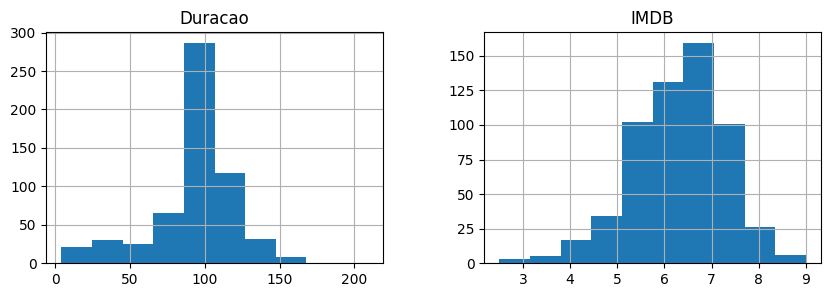

In [12]:
# Histograma
ds.hist(figsize = (10,3))
plt.show()

O gráfico mostra que as variáveis IMDB e Duracao apresentam um comportamento aproximado de uma curva normal.

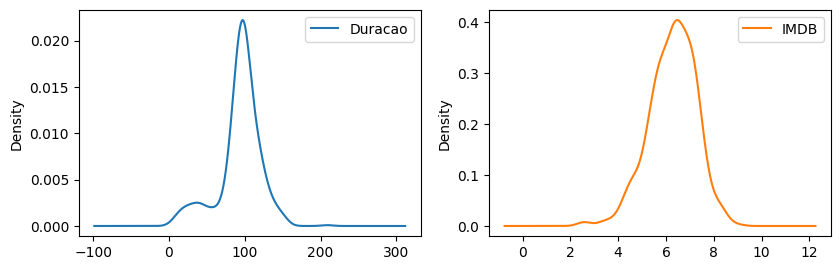

In [13]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Existe moda única para ambas variáveis, sem skew.

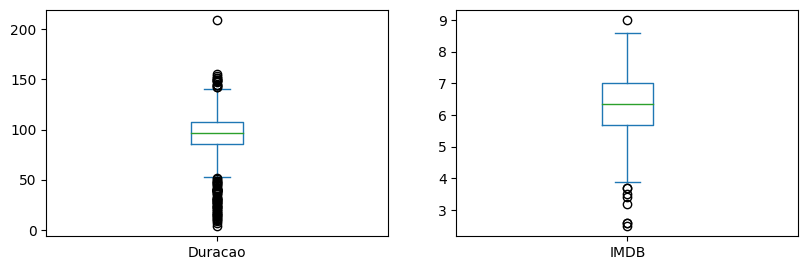

In [14]:
# Boxplot
ds.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Outliers presentes em ambas variáveis

**Determinando os Outliers**

Em seguida, utilizarei gráficos de boxplot para visualmente observar a existencia de outliers nas variáveis IMDB e Duração

Outliers de IMDB: 9
Outliers de Duracao: 75


<Figure size 1000x1500 with 0 Axes>

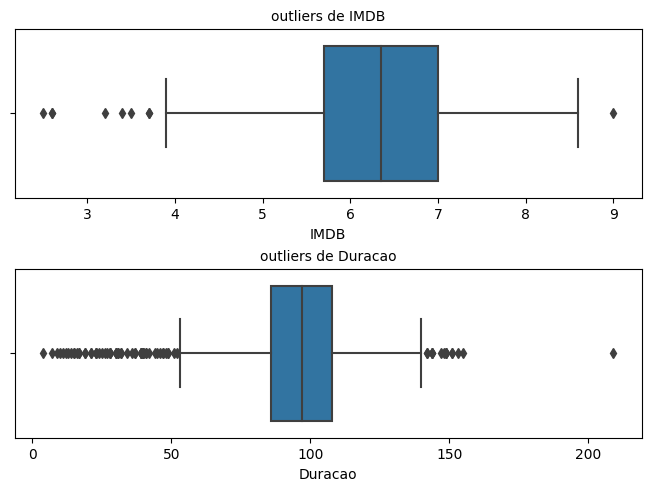

In [15]:
imprime2graficosboxplot('IMDB', 'Duracao')

---


**Percepções da análise estatística Visual:**


*   Os gráficos de histograma e densidade mostram as variáveis IMDB e Duracao apresentando um comportamento aproximado de uma curva normal. 
*   O gráfico boxplot mostra a existencia de outliers em ambas as variáveis.
*   O gráfico de densidade mostra ainda apenas uma moda para cada variável e, também não apresentam *skew*, o que sugere que o valor da mediana é próximo a média, apesar dos outliers presentes.
*   A média do tempo de duração está na ordem dos 90 minutos (93,6) e o desvio-padrão em quase 30 minutos (27,8).







---



---
Existem outliers em ambas as variaveis:

IMDB - 9 
  
Duração - 75



---



### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma correlação entre as variáveis numéricas preditoras com a variável alvo IMDB. 

inicialmente, como temos apenas 2 variaveis numéricas, IMDB e Duracao, faremos a analise nelas. 

Será avaliado a existencia de uma possivel correlação, e também se existe algum relacionamento entre estas variáveis.

Medindo a correlação e avaliando a dispersão entre as variaveis

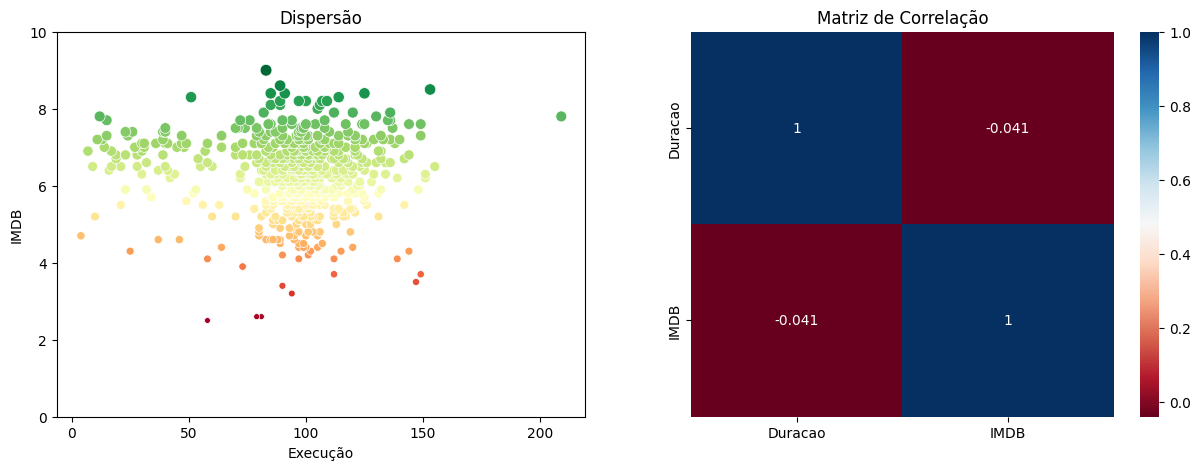

In [16]:
plt.figure(figsize= (15, 5))

#grafico de dispersão entre as variaveis IMDB  e Duração
plt.subplot(1, 2, 1)

ax = sns.scatterplot(data= ds, 
                x= 'Duracao', 
                y= 'IMDB', 
                hue= 'IMDB', 
                size= 'IMDB',
                palette= 'RdYlGn',
                legend= False)

ax.set_ylim((0, 10))
plt.title('Dispersão', size= 12)
plt.xlabel('Execução', size= 10)
plt.ylabel('IMDB', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)

# Matriz de Correlação entre as variaveis IMDB Score e Runtime
plt.subplot(1, 2, 2)

plt.title('Matriz de Correlação', size= 12)
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');

#sns.histplot(ds['Runtime'])
#plt.title('Runtime Distribuition', size= 20)
#plt.xlabel('Runtime', size= 17)
#plt.yticks(size= 15)
#plt.xticks(size= 15)

plt.show()


---


**Percepção da análise Multimodal de correlação e dispersão**

*  Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB)
*  avaliando o relacionamento, aparentemente as maiores notas IMDB se situam em volta da média de duração (90 minutos) com até um desvio padrão de distancia (30 minutos)
*   Um outro achado é que aparentemente os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem  avaliações mais alta em comparação a média.







---





---
**Demais Visualizações**


Continuando a análise exploratória, a ideia a seguir é analisar o comportamento das possiveis variaveis preditoras Premiere, Linguagem e Genero com relação a variável alvo IMDB.

Primeiramente, para uma melhor análise do possivel efeito da variavel object Premiere na avaliação (IMDB) é interessante desmembrá-la  em novas variáveis numéricas: Ano, mes e dia da semana.

In [17]:
# Desmembrando Premiere em Ano, mes e dia da semana
ds['Data'] = pd.to_datetime(ds.Premiere)
ds['DiaSemana'] = ds['Data'].dt.day_of_week # dia da semana com segunda-feira=0, domingo=6.
ds['Mes'] = ds['Data'].dt.month
ds['Ano'] = ds['Data'].dt.year 

# Conferindo a tabela - Mostrando 5 linhas com novas variáveis
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,percepcao,Data,DiaSemana,Mes,Ano
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,negativa,2019-08-05,0,8,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,negativa,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,negativa,2019-12-26,3,12,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,negativa,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,negativa,2020-10-30,4,10,2020


In [18]:
# Mostrando as novas informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Titulo     584 non-null    object        
 1   Genero     584 non-null    object        
 2   Premiere   584 non-null    object        
 3   Duracao    584 non-null    int64         
 4   IMDB       584 non-null    float64       
 5   Linguagem  584 non-null    object        
 6   percepcao  584 non-null    category      
 7   Data       584 non-null    datetime64[ns]
 8   DiaSemana  584 non-null    int64         
 9   Mes        584 non-null    int64         
 10  Ano        584 non-null    int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 46.4+ KB
None


Em seguida, inicio a análise

**i. Relação entre a Data do lançamento (Premiere) e a avaliação (IMDB) obtida.**

Nesta próxima etapa da análise, será avaliada a relação entre a data de lancamento e a sua avaliação obtida. Para isto as questões a responder aqui serão:

1. Em que ano houve um maior lançamento de filmes originais?

2. Em qual mes houve maior número de lançamentos de filmes originais?

3. Qual dia de semana há uma preferência por lançamentos?


A primeira etapa envolverá entender a distribuição dos lançamentos no tempo (ano, mes e dia de semana) e a respectiva pontuação IMDB

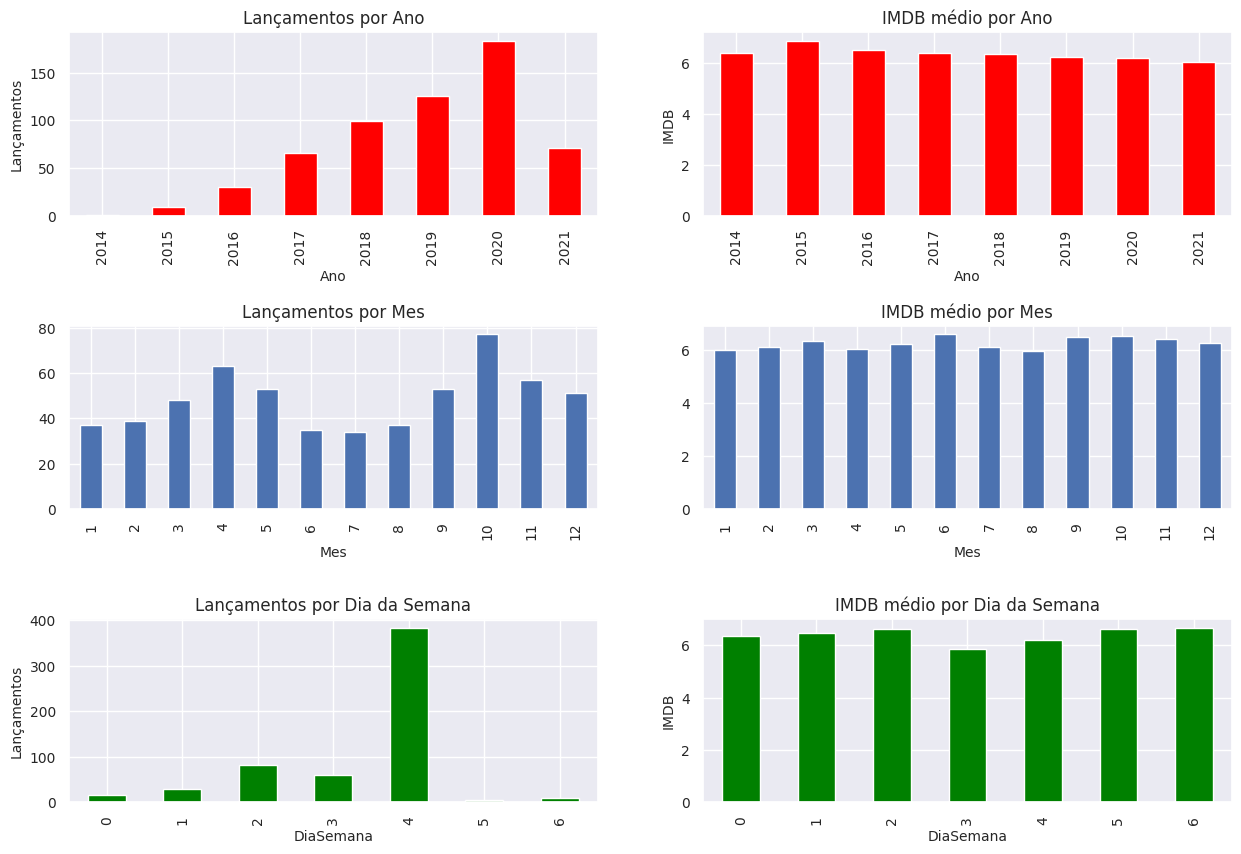

In [46]:
# preparando os gráficos
plt.figure(figsize= (15, 10))

# gráfico de quantidade por ano
plt.subplot(3, 2, 1)
plt.title('Lançamentos por Ano', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('ano', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Ano")["Titulo"].count().plot(kind = "bar", color='red')

# gráfico de IMDB por ano
plt.subplot(3, 2, 2)
plt.title('IMDB médio por Ano', size= 12)
plt.ylabel('IMDB', size= 10)
plt.xlabel('ano', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Ano")["IMDB"].mean().plot(kind = "bar", color='red')

# gráfico de quantidade por mes
plt.subplot(3, 2, 3)
plt.title('Lançamentos por Mes', size= 12)
#plt.ylabel('Lançamentos', size= 10)
plt.xlabel('mes', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Mes")["Titulo"].count().plot(kind = "bar")

# gráfico de IMDB por mes
plt.subplot(3, 2, 4)
plt.title('IMDB médio por Mes', size= 12)
#plt.ylabel('Lançamentos', size= 10)
plt.xlabel('mes', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Mes")["IMDB"].mean().plot(kind = "bar")

# gráfico de quantidade por dia de semana
plt.subplot(3, 2, 5)
plt.title('Lançamentos por Dia da Semana', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('Dia da Semana', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
#label_diasem = ['domingo','2af','3af','4af','5af','6af','sábado']
ds.groupby("DiaSemana")["Titulo"].count().plot(kind = "bar", color='green')

# gráfico de IMDB por dia de semana
plt.subplot(3, 2, 6)
plt.title('IMDB médio por Dia da Semana', size= 12)
plt.ylabel('IMDB', size= 10)
plt.xlabel('Dia da Semana', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
#label_diasem = ['domingo','2af','3af','4af','5af','6af','sábado']
ds.groupby("DiaSemana")["IMDB"].mean().plot(kind = "bar", color='green')


# apresntando os gráficos
plt.subplots_adjust(hspace=0.6);
plt.show()

In [20]:
tabela_por_titulo_imdb('DiaSemana',7, 2)

,DiaSemana,IMDB
6,6,6.677778
2,2,6.630488
5,5,6.620000
1,1,6.496552
0,0,6.370588
4,4,6.224804
3,3,5.847458




Nestas top 7 ocorrências de DiaSemana por média de IMDb temos valor máximo 6.7 e minimo de 5.8


In [21]:
tabela_por_titulo_imdb('Ano',8, 3)

,Ano,IMDB
1,2015,6.877778
2,2016,6.513333
3,2017,6.422727
0,2014,6.400000
4,2018,6.360606
5,2019,6.259200
6,2020,6.195082
7,2021,6.046479




Nestas 8 ocorrências de Ano por média de IMDb temos valor máximo 6.9 e minimo de 6.0


In [22]:
tabela_por_titulo_imdb('Mes',12, 3)

,Mes,IMDB
5,6,6.582857
9,10,6.522078
8,9,6.481132
10,11,6.398246
2,3,6.322917
11,12,6.274510
4,5,6.213208
1,2,6.117949
6,7,6.091176
3,4,6.049206




Nestas 12 ocorrências de Mes por média de IMDb temos valor máximo 6.6 e minimo de 6.0




---

**Respostas as perguntas:**
1. Em que ano houve um maior lançamentos de filmes originais?

  R: O ano com maior número de lançamentos no periodo avaliado foi 2020 no periodo estudado 

2. Em qual mes do ano ocorre um maior número de lançamentos de filmes originais?

  R: Existe uma tendencia de lançamentos nos meses de abril e outubro no periodo estudado 

3. Qual dia de semana há uma preferencia por lançamentos?

  R: Existe uma tendencia de lançamentos na 4a feira no periodo estudado 

**Outras Conclusões e Percepções**

* Observa-se uma tendência quase linear de aumento de lançamentos de originais, que foi quebrada em 2021, provavelmente devido a pandemia, que ocasionou atrasos e adiamentos de novas produções




---



### index

In [23]:
#top_titulos_df = ds.groupby(['Ano'], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
#avg_rating_df = ds.groupby([('Ano','Titulo')], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)

TESTE

---



**ii. Análise da variável "Genero"**

Nesta próxima etapa da análise, será avaliada a influência do "Genero" na quantidade de lançamentos realizados e na avaliação obtida. Para isto as questões a responder aqui serão:

1. Quantos e quais os principais generos?
2. Quais gêneros de filmes foram os mais lançados?
3. Quais gêneros de filmes tem melhor avaliação dentre os mais lançados?
4. Quais gêneros de filmes tem melhor avaliação?

Primeiramente vamos avaliar o universo que será analisado, buscado a quantidade de diferentes Generos empregados nos filmes lançados

In [24]:
generos_df = conta_var('Genero')
print(f'Dimensões do dataset: {ds.shape}')

Existem 115 diferentes Genero
Dimensões do dataset: (584, 11)


Existem 115 diferentes ocorrências de "Genero" nos filmes lançados

Passando agora a analisar a distribuição destes gêneros, em função destes lançamentos. 

Para termos uma visão geral desta variável "Genero", vamos selecionar inicialmente os 50 maiores gêneros lançados, a fim de poder analisar o gráfico gerado

<Figure size 1500x1000 with 0 Axes>

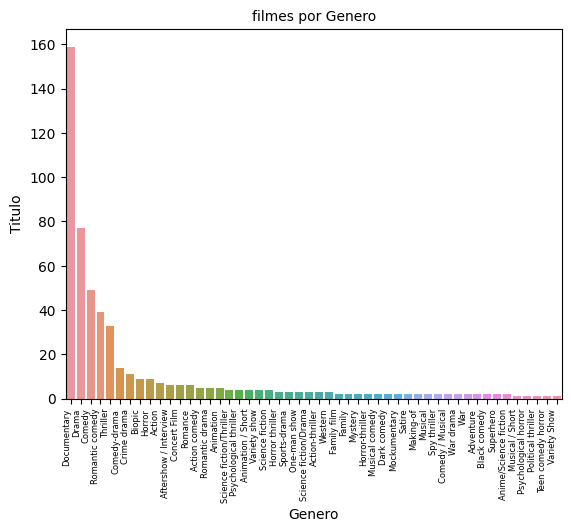

In [25]:
# pegando 50 maiores ocorrencias para deixar o grafico legível
generos_df=generos_df[0:50]

plt.figure(figsize=(15,10))
fig, ax = plt.subplots(1,1)

ax.set_title('filmes por Genero', fontsize = 10)
ax.set_xlabel('Lançamentos', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)

sns.barplot(y = 'Titulo', x = 'Genero', data = generos_df, ax = ax)

fig.show()

In [26]:
tabela_por_titulo_imdb('Genero',15, 1)

,Genero,Titulo
45,Documentary,159
46,Drama,77
32,Comedy,49
81,Romantic comedy,39
106,Thriller,33
36,Comedy-drama,14
41,Crime drama,11
26,Biopic,9
60,Horror,9
0,Action,7




Nestas top 15 ocorrências de Genero temos 435 títulos
Esta amostra equivale a 74.5% do total lançado


Observa-se no gráfico uma distribuição de ocorrências próxima a exponencial. 

Os 10 melhores colocados somam 435 títulos, o que corresponde a cerca de 75% do total lançado. Assim, para esta próxima análise vou trabalhar com esta amostra de 15.

<Figure size 1000x1500 with 0 Axes>

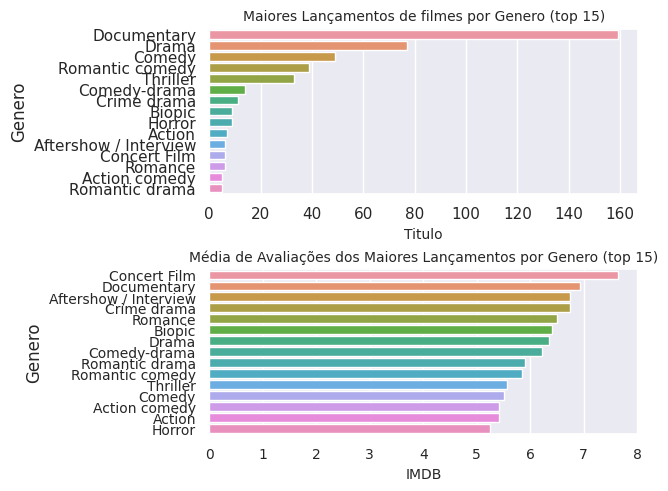

In [27]:
# vamos trabalhar com os top 10
# analisa Genero x IMDB top 10
imprime_por_titulo_imdb('Genero',15, True)

In [28]:
tabela_por_titulo_imdb('Genero',15, 2)

,Genero,IMDB
40,Concert Film,7.633333
45,Documentary,6.936478
10,Aftershow / Interview,6.750000
41,Crime drama,6.745455
79,Romance,6.500000
26,Biopic,6.400000
46,Drama,6.342857
36,Comedy-drama,6.214286
84,Romantic drama,5.900000
81,Romantic comedy,5.848718




Nestas top 15 ocorrências de Genero por média de IMDb temos valor máximo 7.6 e minimo de 5.3


Para uma comparação final, serão analisadas as melhores médias de avaliação absolutas, isto é, independentemente do número de filmes lançados.

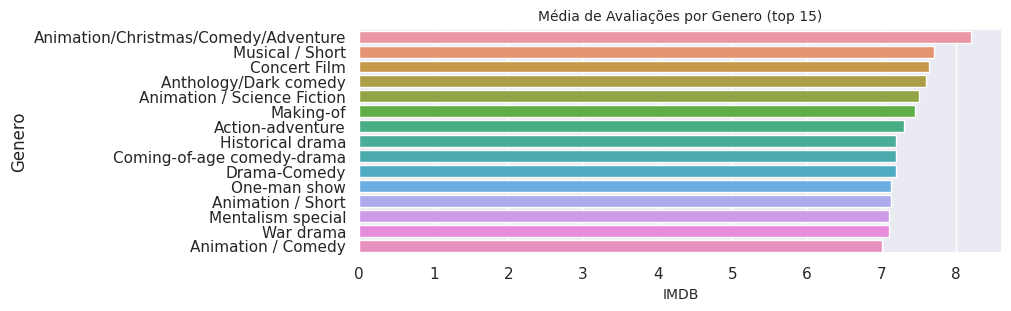

In [29]:
imprime_por_imdb('Genero', 15)

In [30]:
tabela_por_titulo_imdb('Genero',15, 3)

,Genero,IMDB
17,Animation/Christmas/Comedy/Adventure,8.200000
70,Musical / Short,7.700000
40,Concert Film,7.633333
24,Anthology/Dark comedy,7.600000
15,Animation / Science Fiction,7.500000
66,Making-of,7.450000
3,Action-adventure,7.300000
58,Historical drama,7.200000
39,Coming-of-age comedy-drama,7.200000
48,Drama-Comedy,7.200000




Nestas 15 ocorrências de Genero por média de IMDb temos valor máximo 8.2 e minimo de 7.0




---


**Resposta as Questões envolvendo "Genero":**

1. Quantos diferentes gêneros existem?

  Existem 115 diferentes gêneros de filmes

2. Quais gêneros de filmes foram os mais lançados?

  Os 10 maiores generos em filmes observados são documentary, drama, Romantic comedy, Thriller, Comedy-Drama, Crime-Drama, Biopic, Horror e Action, totalizando 407 lançamentos

3. Quais gêneros de filmes tem melhor avaliação dentre os mais lançados?

  As melhores avaliações entre os 10 mais lançados são Documentary, Crime drama, Biopic, Drama, Comedy-drama, Romantic comedy, Thriller, Comedy, Action e Horror, com avaliações que vão desde 6,94 a 5,26

4. Quais gêneros de filmes, independente da quantidade de labnçamentos, tem melhor avaliação?

  Vide grafico

**Percepções**

Nenhum dos gêneros mais bem avaliados aparece na lista dos 10 maiores generos usados em lançamentos.

As notas das top 10 generos mais bem avaliados são superiores as avaliações dos 10 maiores generos usados em lançamentos.

Os generos melhores avaliados tem um amostragem de filmes lancados baixa, o que pode distorcer a análise.

---



**iii. Análise da variável "Linguagem"**

Nesta próxima etapa da análise, será avaliada a influência da "linguagem" dos filmes na quantidade de lançamentos realizados e na avaliação obtida. Para isto as questões a responder aqui serão:

1. Quais linguagens mais lançadas?
2. Quais linguagens tem melhor avaliação dentre os maiores lançamentos?
3. Quais linguagens tem melhor avaliação?

In [31]:
linguagem_df = conta_var('Linguagem')

Existem 38 diferentes Linguagem


<Figure size 5000x1500 with 0 Axes>

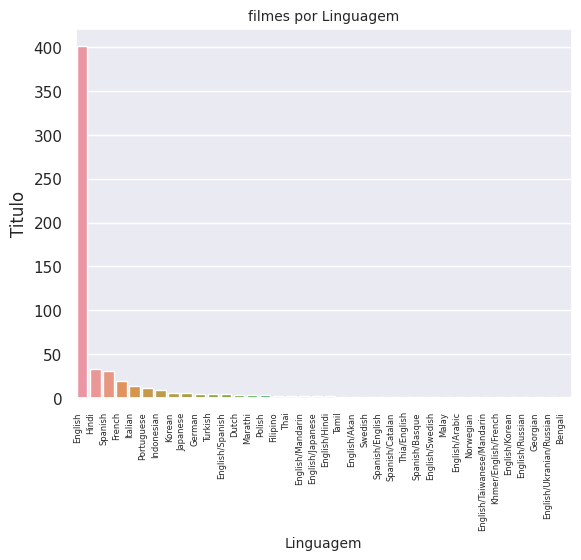

In [32]:
# visão geral dos generos
# pegando as 50 maiores para tornar o grafico legível
#linguagem_df = linguagem_df[0:50]

plt.figure(figsize=(50,15))
fig, ax = plt.subplots(1,1)

ax.set_title('filmes por Linguagem', fontsize = 10)
ax.set_xlabel('Lançamentos', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)

sns.barplot(y = 'Titulo', x = 'Linguagem', data = linguagem_df, ax = ax)

fig.show()

In [33]:
tabela_por_titulo_imdb('Linguagem',15, 1)

,Linguagem,Titulo
2,English,401
18,Hindi,33
29,Spanish,31
15,French,20
20,Italian,14
28,Portuguese,12
19,Indonesian,9
23,Korean,6
21,Japanese,6
17,German,5




Nestas top 15 ocorrências de Linguagem temos 556 títulos
Esta amostra equivale a 95.2% do total lançado


Observa-se no gráfico uma distribuição de ocorrências próxima a exponencial.

Os 15 melhores colocados somam 556 títulos, o que corresponde a cerca de 95% do total lançado. Assim, para esta próxima análise vou trabalhar com esta amostra de 15.

<Figure size 1000x1500 with 0 Axes>

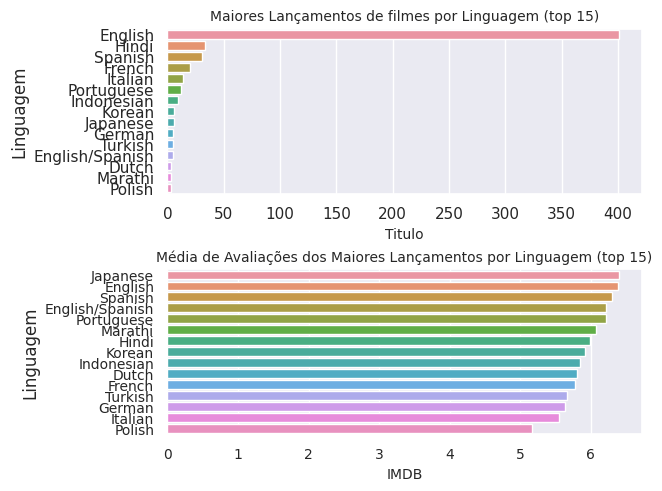

In [34]:
# vamos trabalhar com os top 15
# analisa Linguagem  x IMDB
imprime_por_titulo_imdb('Linguagem',15, True)

In [35]:
tabela_por_titulo_imdb('Linguagem',15, 2)

,Linguagem,IMDB
21,Japanese,6.400000
2,English,6.380050
29,Spanish,6.303226
10,English/Spanish,6.220000
28,Portuguese,6.216667
25,Marathi,6.066667
18,Hindi,5.981818
23,Korean,5.916667
19,Indonesian,5.844444
1,Dutch,5.800000




Nestas top 15 ocorrências de Linguagem por média de IMDb temos valor máximo 6.4 e minimo de 5.2


Para uma comparação final, serão analisadas as melhores médias de pontuação por linguagem absolutas, isto é, independentemente do número de filmes lançados.

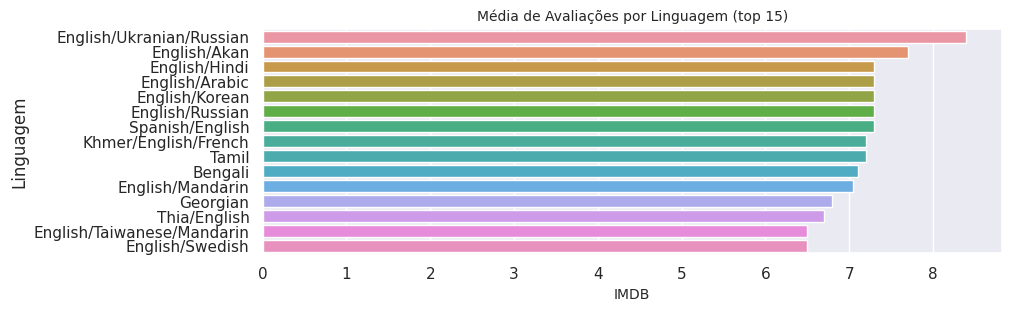

In [36]:
imprime_por_imdb('Linguagem', 15)

In [37]:
tabela_por_titulo_imdb('Linguagem',15, 3)

,Linguagem,IMDB
13,English/Ukranian/Russian,8.40
3,English/Akan,7.70
5,English/Hindi,7.30
4,English/Arabic,7.30
7,English/Korean,7.30
9,English/Russian,7.30
32,Spanish/English,7.30
22,Khmer/English/French,7.20
34,Tamil,7.20
0,Bengali,7.10




Nestas 15 ocorrências de Linguagem por média de IMDb temos valor máximo 8.4 e minimo de 6.5




---
**Resposta as Questões envolvendo "Linguagem":**

1. Quais linguagens mais lançadas?

  As linguagens mais usadas em filmes são (em ordem decrescente de quantidade de filmes): English, Hindi, Spanish, French, Italian, Portuguese, Indonesian, Korean, Japanese e German.

2. Quais linguagens tem melhor avaliação dentre os maiores lançamentos?

  Já dentre estas linguagens (mais usadas em filmes), a ordem decrescente das medias das avaliações é: Japanese, English, Spanish, Portuguese, Hindi, Korean, Indonesian, French, German e Italian.

3. Quais linguagens tem melhor avaliação?

  Vide gráfico

**Percepções**

A linguagem English aparece como uma das linguagens disponiveis nas 8 melhores avaliadas.

Nenhuma das linguagens mais bem avaliadas aparece na list das 10 maiores linguagens usadas em lançamentos.

As notas das top 10 Linguagens mais bem avaliados são superiores as avaliações das 10 maiores linguagens usadas em lançamentos.


---



## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook.

### 4.1. Tratamento de Missings e Limpeza

Avaliando a ocorrencia de nulls e/ou linhas duplicadas, verificando agora a quantidade de linhas preenchidas por coluna, número de valores nulls e ocorrencia de duplicidad

In [38]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
Titulo       0
Genero       0
Premiere     0
Duracao      0
IMDB         0
Linguagem    0
percepcao    0
Data         0
DiaSemana    0
Mes          0
Ano          0
dtype: int64

*** Linhas duplicadas ***
0


In [39]:
# exibindo um sumário estatístico
display(ds.describe())

,Duracao,IMDB,DiaSemana,Mes,Ano
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,93.577055,6.271747,3.392123,6.859589,2018.936644
std,27.761683,0.979256,1.130585,3.466697,1.473992
min,4.000000,2.500000,0.000000,1.000000,2014.000000
25%,86.000000,5.700000,3.000000,4.000000,2018.000000
50%,97.000000,6.350000,4.000000,7.000000,2019.000000
75%,108.000000,7.000000,4.000000,10.000000,2020.000000
max,209.000000,9.000000,6.000000,12.000000,2021.000000


Aparentemente sem valores nulos e os valores 0 que aparecem na variável DiaSemana são válidos e significam "Domingo". Isto garante também que os valores da variavel objeto Premiere são válidos, pois nao aconteceu nenhum erro na conversão para Ano, Mes e diaSemana.

Para uma certificação de que realmente não há missing faremos uma visão gráfica.

<Axes: >

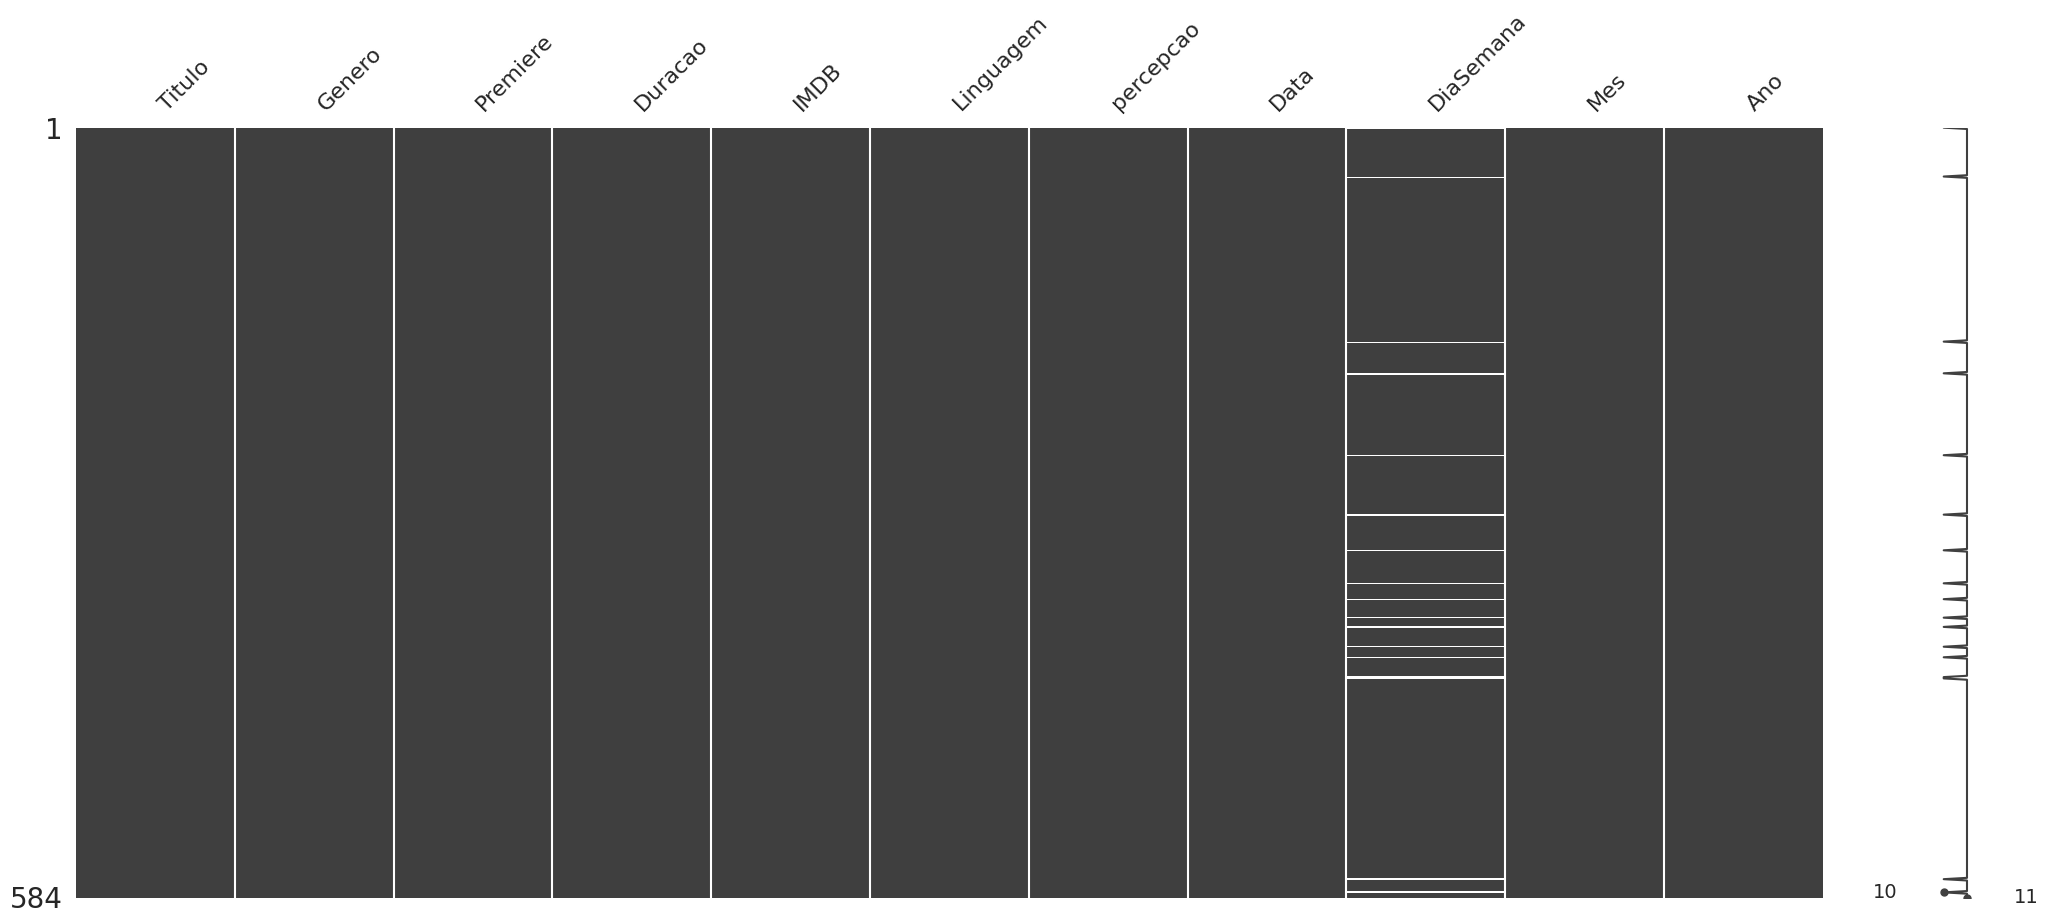

In [40]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
dsNoMiss = ds[col[:]]

# substituindo os zeros por NaN - sem neessidade desta etapa
dsNoMiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)

In [41]:
# verificando novamente nulls no dataset
dsNoMiss.isnull().sum()

Titulo        0
Genero        0
Premiere      0
Duracao       0
IMDB          0
Linguagem     0
percepcao     0
Data          0
DiaSemana    17
Mes           0
Ano           0
dtype: int64

Como esperado, a análise mostra apenas o falso Missing, uma vez que o valor 0 na variavel DiaSemana é válido e significa "Domingo".

Desprezando as colunas derivadas de Premiere e reavaliando

---



<Axes: >

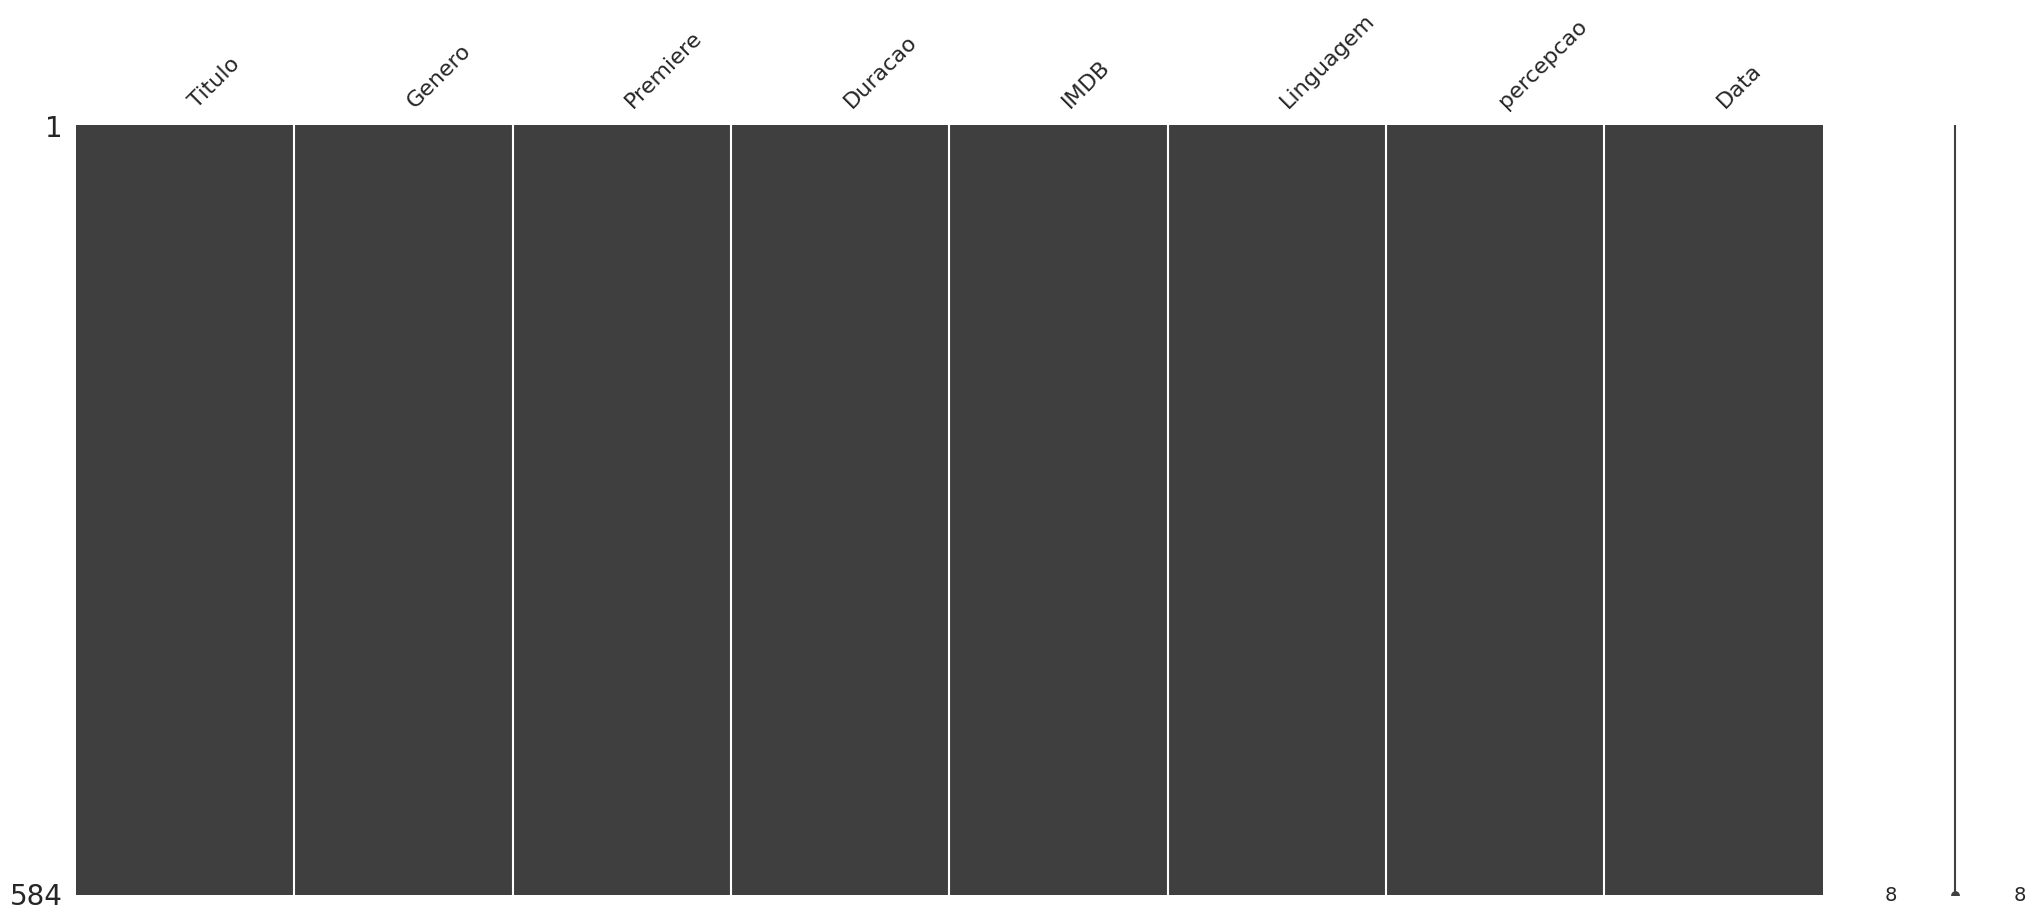

In [42]:
# removendo as colunas deviradas de Premiere
dsNoMiss.drop(['Ano', 'Mes', 'DiaSemana'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)



---


**Resumo da análise de Missing e duplicatas**

*   Não há valor nulo no conjunto de dados.
*   Não há variáveis duplicadas


---



### 4.2. Separação em conjunto de treino e conjunto de teste

In [44]:
from sklearn.model_selection import train_test_split
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = ds.values
X = array[:,0:10]
y = array[:,10]
#print(X[0:10])
#ds.head(10)
#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                    shuffle=True, random_state=seed, stratify=y) # com estratificação

ValueError: ignored